#Importing Libraries

In [1]:
import pandas as pd #linear algebra
import numpy as np #data processing
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for plotting

#Loading the datasets

In [2]:
#loading fifa ranking dataset
fifa_ranking = pd.read_csv('/content/fifa_ranking.csv')
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [3]:
#Loading the results dataset
results = pd.read_csv('/content/results.csv')
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


#Accessing information in the datasets

1.Fifa Ranking

In [4]:
#Checking the number of rows and columns for fifa
#ranking dataset
fifa_ranking.shape

(57793, 16)

In [5]:
#checking for datatypes
fifa_ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [6]:
#checking for info
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

2.Results

In [7]:
#checking for the number of rows and columns in the results dataset
results.shape

(40839, 9)

In [8]:
#checking for datatypes
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [9]:
#checking for info
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


#Data Cleaning

#1.Fifa Ranking Dataset

In [10]:
#checking for null values
fifa_ranking.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [11]:
#checking if we have duplicated values
fifa_ranking.duplicated().any()

True

In [12]:
#Dropping duplicated values
fifa_ranking.drop_duplicates(keep=False, inplace=True)

In [13]:
#Confirming if the duplicates have actually been dropped
fifa_ranking.duplicated().any()

False

In [14]:
#checking for Anomalies/Outliers
for i in fifa_ranking:
  print(i, fifa_ranking[i].value_counts())

rank 147    303
112    301
199    300
129    299
153    299
      ... 
204    157
206    138
207     89
208     19
209      9
Name: rank, Length: 209, dtype: int64
country_full Lebanon                          286
Libya                            286
St Vincent and the Grenadines    286
Jamaica                          286
Wales                            286
                                ... 
Zaire                             66
Serbia and Montenegro             43
Kosovo                            24
Gibraltar                         22
RCS                                5
Name: country_full, Length: 216, dtype: int64
country_abrv ARU    286
LAO    286
CAN    286
USA    286
ALB    286
      ... 
ZAI     66
SCG     43
KVX     24
GIB     22
TCH      5
Name: country_abrv, Length: 216, dtype: int64
total_points 0.00      40712
63.75        48
38.25        39
66.00        33
33.00        31
          ...  
218.49        1
144.95        1
164.04        1
222.91        1
702.88        1
N

*The fifa ranking dataset doesn't contain any null values

*The fifa ranking dataset contains duplicated values thus we drop them

*The fifa ranking dataset doesn't contain any anomalies

#2.Results Dataset

In [15]:
#Checking for null values
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [16]:
#Checking for duplicates
results.duplicated().any()

False

In [17]:
#Checking for Anomalies/Outliers
for i in results:
  print(i, results[i].value_counts())

date 2012-02-29    66
2016-03-29    63
2008-03-26    60
2014-03-05    59
2012-11-14    56
              ..
1996-04-14     1
1973-06-22     1
2009-11-11     1
2010-07-06     1
1970-08-19     1
Name: date, Length: 15115, dtype: int64
home_team Brazil                   563
Argentina                545
Mexico                   510
Germany                  501
England                  489
                        ... 
Sark                       1
Crimea                     1
St. Pierre & Miquelon      1
Central Spain              1
Kabylia                    1
Name: home_team, Length: 309, dtype: int64
away_team Uruguay               536
Sweden                527
England               505
Hungary               472
Paraguay              448
                     ... 
Surrey                  1
Andalusia               1
Corsica                 1
Parishes of Jersey      1
Central Spain           1
Name: away_team, Length: 306, dtype: int64
home_score 1     12073
0      9800
2      9039
3      480

*The results dataset is clean with no null values, duplicates and anomalies

#Exploratory Data Analysis

#Joining the two datasets

In [18]:
#Renaming the necessary column that is going to be used to join onto
#the other dataset
fifa_ranking.rename(columns = {'country_full':'country'}, inplace=True)

In [19]:
#Viewing if the change has been made
fifa_ranking.head()

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [57]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [58]:
#Merging the two dataframes
fifa_results = pd.merge(fifa_ranking, results, on = 'country', how = 'outer')

In [59]:
fifa_results.head()

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1.0,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1909-04-04,Germany,Switzerland,1.0,0.0,Friendly,Karlsruhe,False
1,1.0,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-05-16,Germany,Belgium,0.0,3.0,Friendly,Duisburg,False
2,1.0,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-10-16,Germany,Netherlands,1.0,2.0,Friendly,Kleve,False
3,1.0,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-03-26,Germany,Switzerland,6.0,2.0,Friendly,Stuttgart,False
4,1.0,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-10-09,Germany,Austria,1.0,2.0,Friendly,Dresden,False


Dropping irrelevant columns

In [60]:
fifa_results.drop(['country','country_abrv','total_points','previous_points','rank_change','cur_year_avg','cur_year_avg_weighted','last_year_avg','last_year_avg_weighted','two_year_ago_avg','two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted','confederation','date'], axis=1, inplace=True)

In [62]:
fifa_results.drop(['city'], axis=1, inplace=True)

In [63]:
fifa_results.head()

,rank,rank_date,home_team,away_team,home_score,away_score,tournament,neutral
0,1.0,1993-08-08,Germany,Switzerland,1.0,0.0,Friendly,False
1,1.0,1993-08-08,Germany,Belgium,0.0,3.0,Friendly,False
2,1.0,1993-08-08,Germany,Netherlands,1.0,2.0,Friendly,False
3,1.0,1993-08-08,Germany,Switzerland,6.0,2.0,Friendly,False
4,1.0,1993-08-08,Germany,Austria,1.0,2.0,Friendly,False


Creating home team rank and away team rank columns

In [66]:
Home_rank = fifa_results[['home_team','rank']]

In [165]:
fifa_results['Home_Team_Rank'] = Home_rank['rank']

In [166]:
Home_rank

,home_team,rank
0,Germany,1.0
1,Germany,1.0
2,Germany,1.0
3,Germany,1.0
4,Germany,1.0
...,...,...
10244202,Northern Mariana Islands,NaN
10244203,East Timor,NaN
10244204,East Timor,NaN
10244205,East Timor,NaN


In [74]:
away_rank = fifa_results[['away_team','rank']]

In [76]:
fifa_results['Away_Team_Rank'] = away_rank['rank']

In [75]:
away_rank.head()

,away_team,rank
0,Switzerland,1.0
1,Belgium,1.0
2,Netherlands,1.0
3,Switzerland,1.0
4,Austria,1.0


Separing years from the datetime column

In [90]:
import datetime as dt
fifa_results['rank_date'] = pd.to_datetime(fifa_results['rank_date'], format='%Y%m%d')
fifa_results['year'] = fifa_results['rank_date'].dt.year

In [92]:
fifa_results['rank_date'].dtypes

dtype('<M8[ns]')

Adding a new column of status that contains

*lose(L)
*win(W)
*draw(D)

In [94]:
fifa_results['status'] = np.where(fifa_results['home_score'] == fifa_results['away_score'], 'D', np.where(
    fifa_results['home_score'] > fifa_results['away_score'], 'W','L'))

In [96]:
#Dropping duplicates
fifa_results.drop_duplicates(keep=False, inplace=True)

In [97]:
#Dropping null values
fifa_results.dropna(inplace=True)

In [99]:
#Renaming columns appropriately
fifa_results.rename(columns={'home_score':'Home_Team_Score', 'away_score':'Away_Team_Score'}, inplace=True)

In [100]:
fifa_results.head()

,rank,rank_date,home_team,away_team,Home_Team_Score,Away_Team_Score,tournament,neutral,Home_Team_Rank,Away_Team_Rank,year,status
1,1.0,1993-08-08,Germany,Belgium,0.0,3.0,Friendly,False,1.0,1.0,1993.0,L
3,1.0,1993-08-08,Germany,Switzerland,6.0,2.0,Friendly,False,1.0,1.0,1993.0,W
4,1.0,1993-08-08,Germany,Austria,1.0,2.0,Friendly,False,1.0,1.0,1993.0,L
5,1.0,1993-08-08,Germany,Sweden,1.0,3.0,Friendly,False,1.0,1.0,1993.0,L
6,1.0,1993-08-08,Germany,Hungary,1.0,4.0,Friendly,False,1.0,1.0,1993.0,L


In [102]:
#Creating the final clean dataset
df = fifa_results[['home_team', 'Home_Team_Score', 'away_team', 'Away_Team_Score', 'year', 'Home_Team_Rank', 'Away_Team_Rank', 'tournament', 'status']]

In [105]:
# Feature engineering
df['tournament'] = df['tournament'].apply(lambda x:1 if x == 'Friendly' else 2 if x == 'World cup' else 3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [106]:
df.head()

,home_team,Home_Team_Score,away_team,Away_Team_Score,year,Home_Team_Rank,Away_Team_Rank,tournament,status
1,Germany,0.0,Belgium,3.0,1993.0,1.0,1.0,1,L
3,Germany,6.0,Switzerland,2.0,1993.0,1.0,1.0,1,W
4,Germany,1.0,Austria,2.0,1993.0,1.0,1.0,1,L
5,Germany,1.0,Sweden,3.0,1993.0,1.0,1.0,1,L
6,Germany,1.0,Hungary,4.0,1993.0,1.0,1.0,1,L


#Sampling

In [140]:
#Choosing a sample size for easier analysis
# since we have 3 dependent variables and each is supposed to
# have 50 features thus we chose a sample size of 150
df_sample= df.sample(n=150)

In [141]:
df_sample.head()

,home_team,Home_Team_Score,away_team,Away_Team_Score,year,Home_Team_Rank,Away_Team_Rank,tournament,status
7205276,Latvia,0.0,Uzbekistan,3.0,2005.0,67.0,67.0,1,L
1609378,Nigeria,1.0,Mali,0.0,2009.0,10.0,10.0,1,W
4788210,Kuwait,1.0,Bahrain,1.0,2009.0,94.0,94.0,3,D
5046979,United Arab Emirates,1.0,Lebanon,0.0,2007.0,92.0,92.0,3,W
2082873,Nigeria,2.0,Morocco,0.0,2000.0,55.0,55.0,3,W


#Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59d5bdf750>,
      dtype=object)

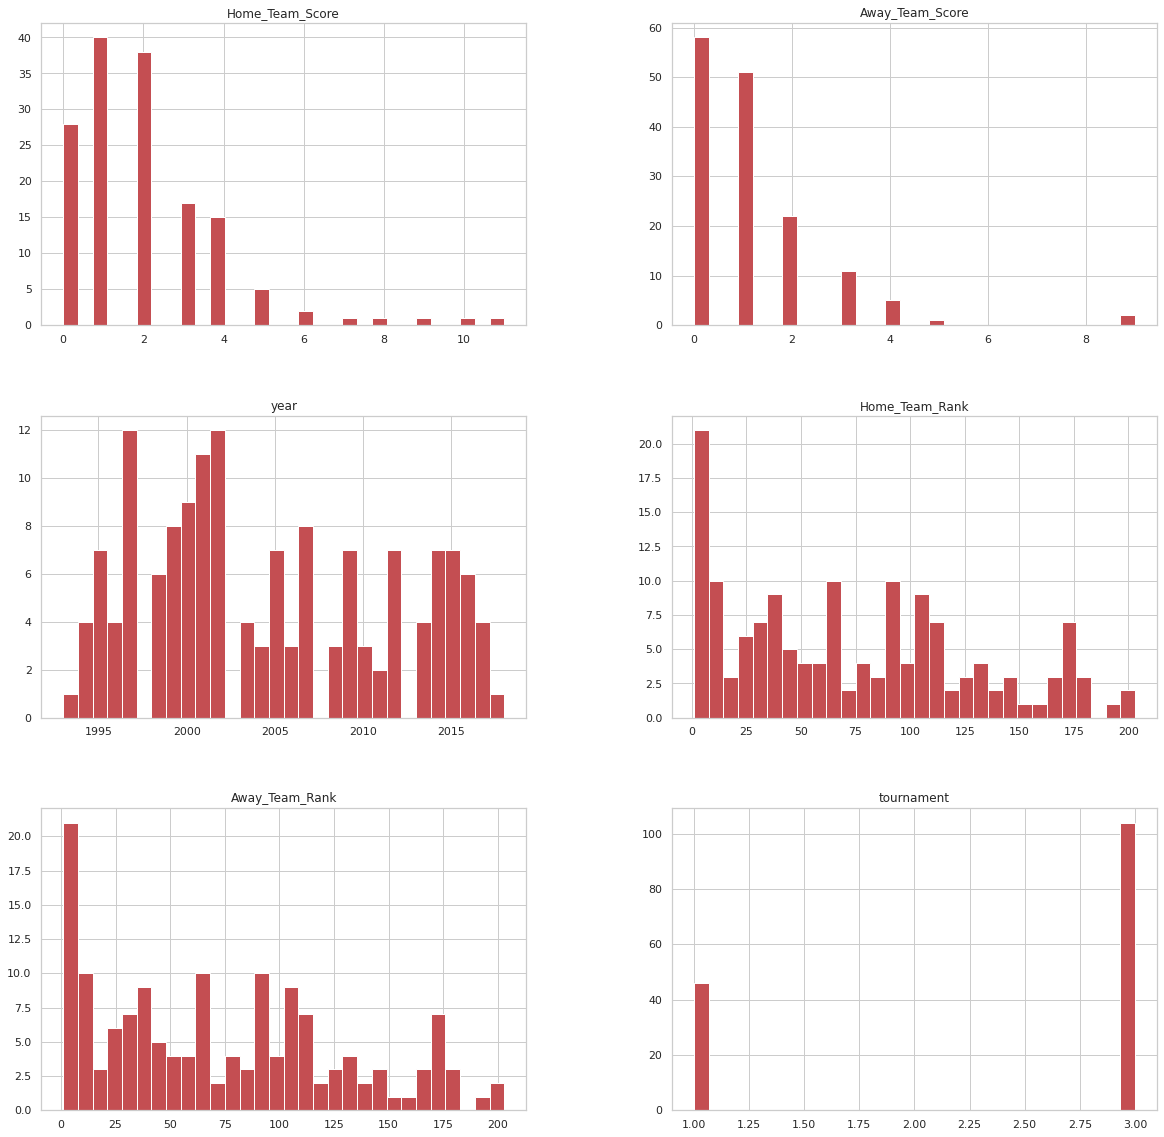

In [156]:
df_sample.hist(bins=30, figsize=(20,20), color='r')

#Bivariate Analysis

General Overview(Correlation)

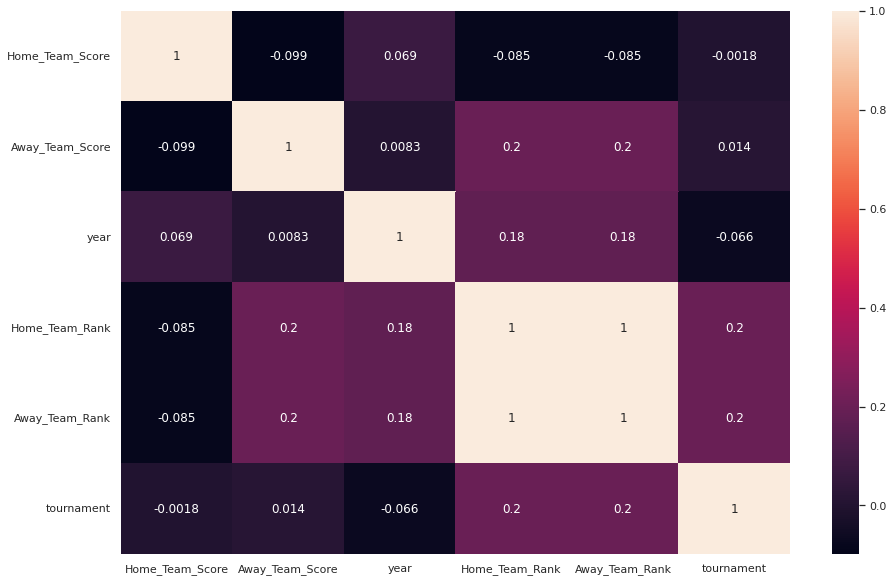

In [158]:
correlations = df_sample.corr()
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(correlations, annot=True)

In [159]:
df_sample.corr()

,Home_Team_Score,Away_Team_Score,year,Home_Team_Rank,Away_Team_Rank,tournament
Home_Team_Score,1.000000,-0.098977,0.069169,-0.085164,-0.085164,-0.001795
Away_Team_Score,-0.098977,1.000000,0.008320,0.199074,0.199074,0.014481
year,0.069169,0.008320,1.000000,0.175289,0.175289,-0.065690
Home_Team_Rank,-0.085164,0.199074,0.175289,1.000000,1.000000,0.201452
Away_Team_Rank,-0.085164,0.199074,0.175289,1.000000,1.000000,0.201452
tournament,-0.001795,0.014481,-0.065690,0.201452,0.201452,1.000000


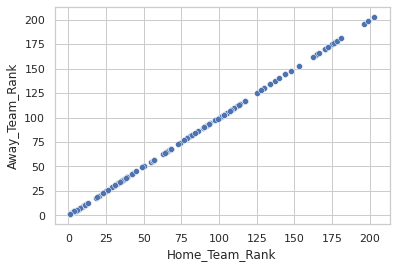

In [160]:
sns.set(style='whitegrid')
sns.scatterplot(x='Home_Team_Rank',
                y='Away_Team_Rank',
                data=df_sample)

there is a linear correlation between away team rank and home team rank

<Figure size 1152x720 with 0 Axes>

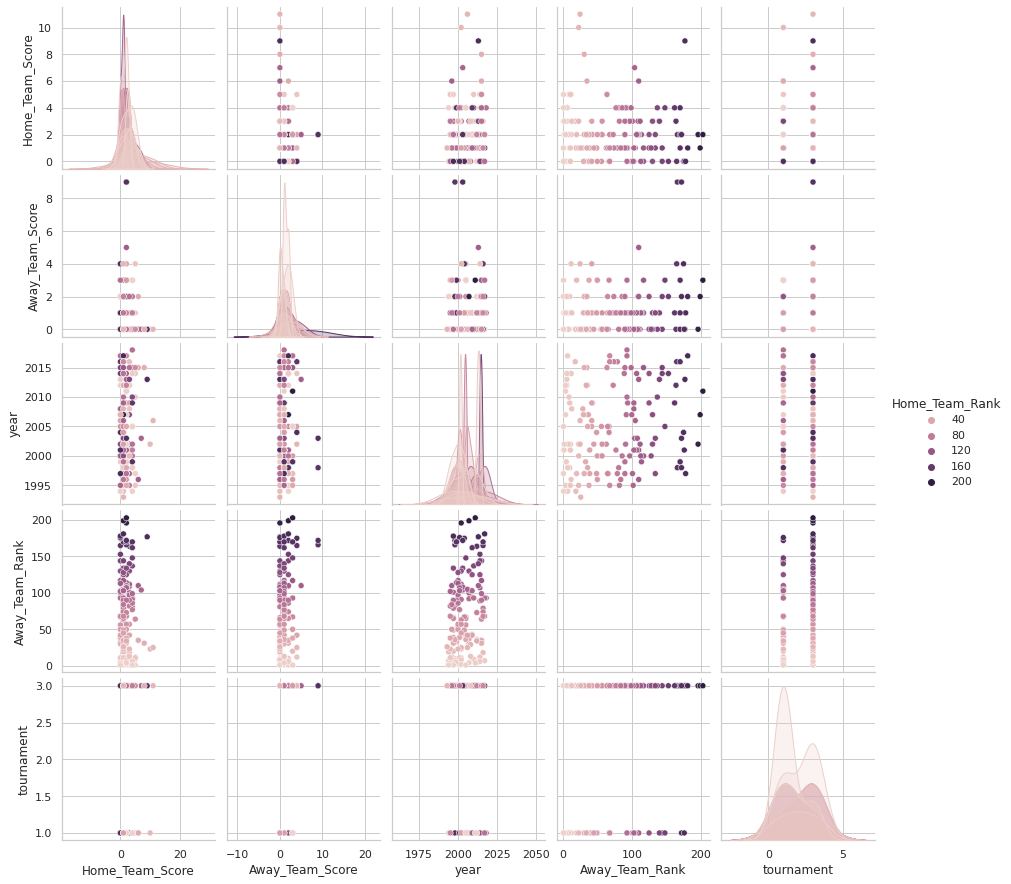

In [164]:
plt.figure(figsize=(16,10))
sns.set(style='whitegrid', palette='muted', color_codes=True)
sns.pairplot(hue='Home_Team_Rank', data=df_sample)

#Polynomial Regression

#Data pre-processing

In [142]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

In [143]:
X = df_sample[['Home_Team_Rank', 'Away_Team_Rank', 'tournament']]
y = df_sample[['Home_Team_Score']]

#Feature Engineering

#Checking for Multicollinearity

In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [145]:
X = df_sample[['Home_Team_Rank', 'Away_Team_Rank', 'tournament']]
calc_vif(X)


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Home_Team_Rank,inf
1,Away_Team_Rank,inf
2,tournament,2.633203


*There is a perfect correlation between Home team rank and Away team rank

#Training the polynomial regression on the whole dataset

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [ ]:
# Splitting the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Fit Linear Regression model to the dataset
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
for col in X.columns:
  plt.scatter(X[col], y, color='blue')
#plt.scatter(X, y, color='blue') 
  plt.plot(X, reg_line.predict(X), color='red')
  plt.title('Home Score(Linear Regression)')
  plt.xlabel('Teams')
  plt.ylabel('Home Score')
  plt.show()


# Fitting polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualizing the Polynomial Regression results
for col in X.columns:
  plt.scatter(X[col], y, color='blue') 
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Home Score (Polynomial Regression)')
plt.xlabel('Teams')
plt.ylabel('Home Score')
plt.show()

In [153]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.4210526315789473
Mean Squared Error: 5.105263157894737
Root Mean Squared Error: 2.2594829403858614


#Logistic Regression

Data pre-processing

In [146]:
X = df_sample[['Home_Team_Rank', 'Away_Team_Rank', 'tournament']]
y = df_sample[['Away_Team_Score']]

Splitting the dataset into training set and test set

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Feature Scaling

In [148]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training the logistic regression model on the training set

In [149]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting the test set results

In [150]:
y_pred = classifier.predict(X_test)

Making the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)